In [10]:
#Feat importnace on the data set with numerical targets 

In [3]:
import pandas as pd
import sys
from pathlib import Path



In [4]:
sys.path.append(str(Path.cwd().parents[1]))
from breast_cancer_ml import config



ModuleNotFoundError: No module named 'breast_cancer_ml'

In [ ]:
sys.path.append(str(project_root))
data = pd.read_csv(config.RAW_DATA_DIR / "breast-cancer.csv")

In [ ]:
X = data.drop("diagnosis", axis = 1)
y = data["diagnosis"]

In [35]:
from sklearn.model_selection import train_test_split

X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X, y, stratify=y, random_state=42)

In [36]:
# Then standardize using only information from the training set
scaler = StandardScaler()
X_orig_train = scaler.fit_transform(X_orig_train)  # Fit to training data and transform it
X_orig_test = scaler.transform(X_orig_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier

feature_names = X.columns.tolist()
forest = RandomForestClassifier(random_state=0)
forest.fit(X_orig_train, y_orig_train)


RandomForestClassifier(random_state=0)

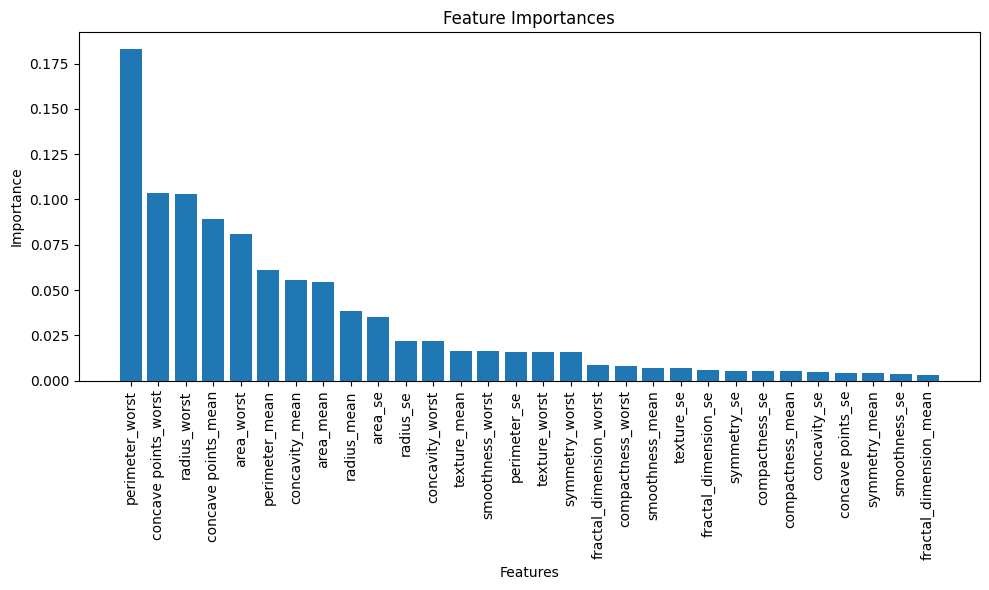

In [38]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = X.columns.tolist() 
orig_importances = forest.feature_importances_

indices = np.argsort(orig_importances)[::-1]



# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_orig_train.shape[1]), orig_importances[indices])
plt.xticks(range(X_orig_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [39]:
orig_feat_imp_df = pd.DataFrame({
    'Feature': [feature_names[i] for i in indices],
    'Importance': orig_importances[indices]
})


In [40]:
orig_feat_imp_df

,Feature,Importance
0,perimeter_worst,0.183059
1,concave points_worst,0.103635
2,radius_worst,0.103212
3,concave points_mean,0.088967
4,area_worst,0.080741
5,perimeter_mean,0.060833
6,concavity_mean,0.055708
7,area_mean,0.054680
8,radius_mean,0.038347
9,area_se,0.035351


In [41]:
# Print the top 10 most important features
print("Top 10 most important features in the original df:")
print(orig_feat_imp_df.head(10))

Top 10 most important features in the original df:
                Feature  Importance
0       perimeter_worst    0.183059
1  concave points_worst    0.103635
2          radius_worst    0.103212
3   concave points_mean    0.088967
4            area_worst    0.080741
5        perimeter_mean    0.060833
6        concavity_mean    0.055708
7             area_mean    0.054680
8           radius_mean    0.038347
9               area_se    0.035351
